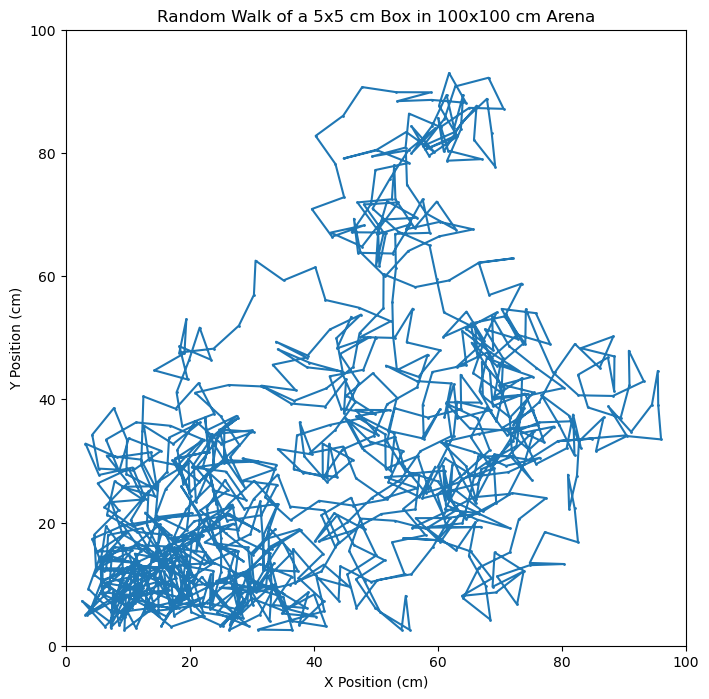

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
arena_size = 100  # Arena size in cm
box_size = 5  # "mouse" size in cm (5x5)
half_box_size = box_size / 2  # Half of the box size, used for boundary calculations
mean_step_length = 5.56  # Mean step length of C57BL/6J mice in cm
sem_step_length = 0.019  # Standard error of the mean (SEM) of step length in cm
mean_speed = 25.5  # Mean speed of C57BL/6J mice in cm/s
sem_speed = 0.69  # Standard error of the mean (SEM) of speed in cm/s
rate_of_direction_change = 0.5  # Time in seconds between changes in direction

# Calculate the time step based on the rate of direction change
# time_step = rate_of_direction_change in seconds

# Initialize the starting position at the center of the arena
position = np.array([arena_size/2, arena_size/2])

# Define the total number of steps in the simulation (adjustable based on how long we want the simulation to be)
num_steps = 1000

# Lists to store the x and y coordinates of the box throughout the simulation
x_positions = [position[0]]
y_positions = [position[1]]

# Simulation loop of the movement of the box (mouse) within the arena
for _ in range(num_steps):
    # Sample the step length and speed from normal distributions 
    # These distributions are defined by their mean and SEM
    step_length = np.random.normal(mean_step_length, sem_step_length)
    speed = np.random.normal(mean_speed, sem_speed)

    # Calculate the duration of each step based on speed and step length
    step_duration = step_length / speed

    # Randomly determine a new direction for the box (mouse) to move (angle in radians)
    angle = np.random.uniform(0, 2 * np.pi)

    # Calculate the new position of the box based on the direction and displacement
    displacement = speed * step_duration
    new_position = position + np.array([displacement * np.cos(angle), displacement * np.sin(angle)])

    # Check for boundary conditions considering the box size
    if new_position[0] - half_box_size < 0 or new_position[0] + half_box_size > arena_size:
        angle = np.pi - angle  # Reflect the angle horizontally (x axis)
        new_position = position + np.array([displacement * np.cos(angle), displacement * np.sin(angle)])

    if new_position[1] - half_box_size < 0 or new_position[1] + half_box_size > arena_size:
        angle = -angle  # Reflect the angle vertically (y axis)
        new_position = position + np.array([displacement * np.cos(angle), displacement * np.sin(angle)])

    # Update the position of the box to the newly calculated position
    position = new_position

    # Store the new position in the lists for later plotting
    x_positions.append(position[0])
    y_positions.append(position[1])

# Plot the random walk of the box within the arena
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, marker='o', markersize=1, linestyle='-')
plt.xlim(0, arena_size)
plt.ylim(0, arena_size)
plt.title("Random Walk of a 5x5 cm Box in 100x100 cm Arena")
plt.xlabel("X Position (cm)")
plt.ylabel("Y Position (cm)")
plt.show()